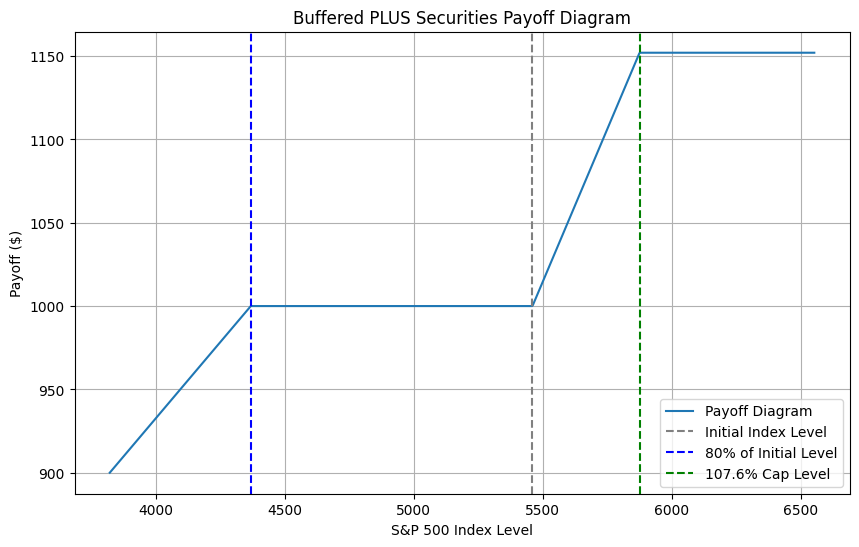

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define initial parameters
S0 = 5460.48  # Initial index level
investment = 1000  # Initial investment
cap = 1.076 * S0  # Cap level
buffer_start = 0.8 * S0  # Buffer start

# Define payoff function
def payoff(S):
    if S < buffer_start:
        return 200 + 1000 * (S / S0)
    elif buffer_start <= S <= S0:
        return 1000
    elif S0 < S <= cap:
        return 1000 + 2000 * ((S - S0) / S0)
    else:
        return 1152

# Generate index values
index_values = np.linspace(0.7 * S0, 1.2 * S0, 1000)
payoff_values = np.array([payoff(S) for S in index_values])

# Plot the payoff diagram
plt.figure(figsize=(10, 6))
plt.plot(index_values, payoff_values, label='Payoff Diagram')
plt.axvline(S0, color='gray', linestyle='--', label='Initial Index Level')
plt.axvline(buffer_start, color='blue', linestyle='--', label='80% of Initial Level')
plt.axvline(cap, color='green', linestyle='--', label='107.6% Cap Level')
plt.xlabel('S&P 500 Index Level')
plt.ylabel('Payoff ($)')
plt.title('Buffered PLUS Securities Payoff Diagram')
plt.legend()
plt.grid()
plt.show()

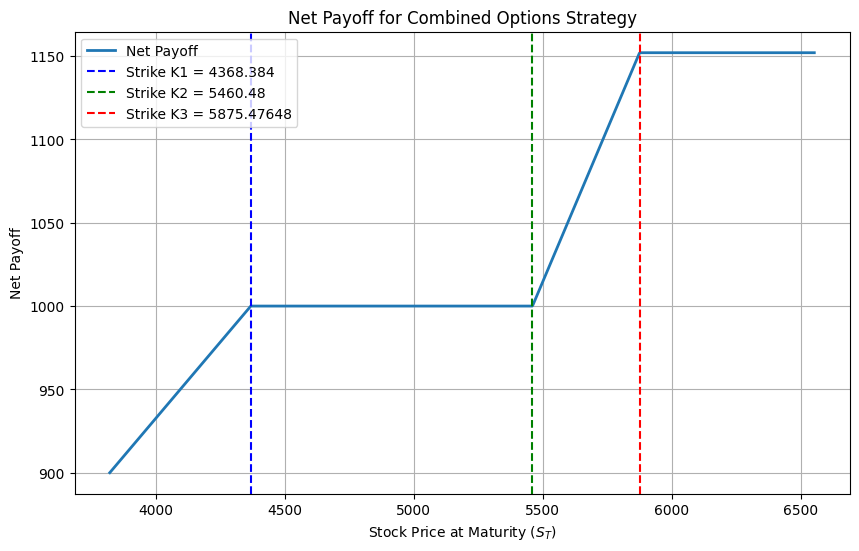

(0.18313408345053916, 0.36626816690107833, 0.36626816690107833)

In [18]:
# Re-import necessary libraries after reset
import numpy as np
import matplotlib.pyplot as plt

# Define strike prices
K1 = 0.8*S0  # Strike price for the put option
K2 = S0  # Strike price for the first call option
K3 = 1.076*S0  # Strike price for the second call option

# Generate stock prices at maturity
S_T = np.linspace(0.7 * S0, 1.2 * S0, 1000)

# Calculate individual payoffs
put_K1 = -np.maximum(K1 - S_T, 0)  # Selling put at K1
call_K2 = np.maximum(S_T - K2, 0)  # Buying call at K2
call_K3 = -np.maximum(S_T - K3, 0)  # Selling call at K3

w1 = 1000/S0
w2 = 2000/S0
w3 = 2000/S0

# Calculate net payoff
option_payoff = w1*put_K1 + w2*call_K2 + w3*call_K3
bond_payoff = 1000
net_payoff = bond_payoff+option_payoff

# Plot the payoff
plt.figure(figsize=(10, 6))
plt.plot(S_T, net_payoff, label='Net Payoff', linewidth=2)
plt.axvline(K1, color='blue', linestyle='--', label=f'Strike K1 = {K1}')
plt.axvline(K2, color='green', linestyle='--', label=f'Strike K2 = {K2}')
plt.axvline(K3, color='red', linestyle='--', label=f'Strike K3 = {K3}')
plt.xlabel('Stock Price at Maturity ($S_T$)')
plt.ylabel('Net Payoff')
plt.title('Net Payoff for Combined Options Strategy')
plt.legend()
plt.grid()
plt.show()


w1,w2,w3

In [19]:
# Re-defining the required parameters and code after environment reset

import numpy as np

# Define parameters
S0 = 345  # Current stock price
K = 350  # Strike price
r = 0.05  # Annualized continuously compounded interest rate
sigma = 0.6  # Volatility
T = 0.5  # Time to maturity (6 months in years)
mu = 0.09  # True expected annual return

# Step 1: Calculate up and down factors
u = np.exp(sigma * np.sqrt(T))
d = np.exp(-sigma * np.sqrt(T))

# Step 2: Calculate risk-neutral probability
p_rn = (np.exp(r * T) - d) / (u - d)

# Step 3: Risk-neutral option pricing (a)
# Terminal stock prices
S_u = S0 * u  # Stock price if it goes up
S_d = S0 * d  # Stock price if it goes down

# Call and put payoffs
call_payoff_u = max(S_u - K, 0)
call_payoff_d = max(S_d - K, 0)
put_payoff_u = max(K - S_u, 0)
put_payoff_d = max(K - S_d, 0)

# Risk-neutral values
call_price = np.exp(-r * T) * (p_rn * call_payoff_u + (1 - p_rn) * call_payoff_d)
put_price = np.exp(-r * T) * (p_rn * put_payoff_u + (1 - p_rn) * put_payoff_d)

# Step 4: Real-world probabilities (b)
expected_ST = S0 * np.exp(mu * T)  # True expected stock price
p_real_up = (expected_ST - S0 * d) / (S0 * (u - d))
p_real_down = 1 - p_real_up

# Step 5: Real-world expected returns for call and put (c)
call_expected_return = p_real_up * call_payoff_u + p_real_down * call_payoff_d
put_expected_return = p_real_up * put_payoff_u + p_real_down * put_payoff_d

# Print results
results = {
    "Risk-neutral call price": call_price,
    "Risk-neutral put price": put_price,
    "Real-world probability up": p_real_up,
    "Real-world probability down": p_real_down,
    "Real-world expected return (call)": call_expected_return,
    "Real-world expected return (put)": put_expected_return,
}
results


{'Risk-neutral call price': 73.40617609561455,
 'Risk-neutral put price': 69.76464530553096,
 'Real-world probability up': 0.4481474071237025,
 'Real-world probability down': 0.5518525928762975,
 'Real-world expected return (call)': 79.46571348152668,
 'Real-world expected return (put)': 68.58610181301934}

In [ ]:
# Re-defining the calculations after reset for parts (d) and (e)

import numpy as np

# Define parameters
S0 = 345  # Current stock price
r = 0.05  # Annualized continuously compounded interest rate
sigma = 0.6  # Volatility
T = 0.5  # Time to maturity (6 months in years)
mu = 0.09  # True expected annual return

# Calculate up and down factors
u = np.exp(sigma * np.sqrt(T))
d = np.exp(-sigma * np.sqrt(T))

# Risk-neutral probabilities
p_rn = (np.exp(r * T) - d) / (u - d)

# Real-world probabilities
expected_ST = S0 * np.exp(mu * T)  # True expected stock price
p_real_up = (expected_ST - S0 * d) / (S0 * (u - d))
p_real_down = 1 - p_real_up

# Terminal stock prices
S_u = S0 * u  # Stock price if it goes up
S_d = S0 * d  # Stock price if it goes down

# Step 6: Expected return analysis for varying strike prices (d)
strike_prices = np.arange(0, 500, 20)  # Strike prices from $0 to $500 in $20 increments
call_expected_returns = []
put_expected_returns = []

for K_var in strike_prices:
    # Call and put payoffs for current strike
    call_payoff_u = max(S_u - K_var, 0)
    call_payoff_d = max(S_d - K_var, 0)
    put_payoff_u = max(K_var - S_u, 0)
    put_payoff_d = max(K_var - S_d, 0)

    # Real-world expected returns for current strike
    call_return = p_real_up * call_payoff_u + p_real_down * call_payoff_d
    put_return = p_real_up * put_payoff_u + p_real_down * put_payoff_d

    # Append to results
    call_expected_returns.append(call_return)
    put_expected_returns.append(put_return)

# Step 7: Early exercise analysis for American put option (e)
K = 350  # Example strike price
S_t_values = np.linspace(0, K, 100)  # Possible stock prices at time t
early_exercise_values = K - S_t_values
holding_values = np.exp(-r * (T - 0.1)) * np.maximum(K - S_t_values, 0)
optimality = early_exercise_values > holding_values

# Compile results
expected_return_results = {
    "Strike Prices": strike_prices,
    "Call Expected Returns": call_expected_returns,
    "Put Expected Returns": put_expected_returns,
}

early_exercise_analysis = {
    "Stock Prices (S_t)": S_t_values,
    "Early Exercise Values": early_exercise_values,
    "Holding Values": holding_values,
    "Optimal to Exercise Early": optimality,
}

expected_return_results, early_exercise_analysis


p_real:
: 0.45
Call Option:
Price: 73.41
Expected Return: 0.08

Put Option:
Price: 69.76
Expected Return: -0.02


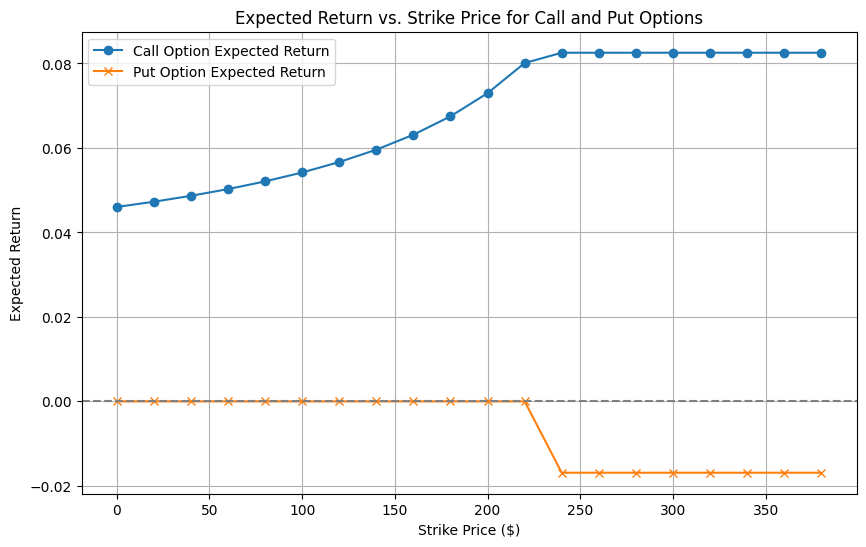

In [22]:
import numpy as np

# Parameters
S0 = 345  # Current Tesla stock price
K = 350  # Strike price
u = np.exp(0.6 * np.sqrt(0.5))  # Up factor
d = np.exp(-0.6 * np.sqrt(0.5))  # Down factor
r = 0.05  # Annualized continuously compounded 3-month interest rate
T = 0.5  # Time to maturity in years
real_return = 0.09  # Real-world expected annual stock price return

# Calculate risk-neutral probability
p = (np.exp(r * T) - d) / (u - d)

# Compute stock prices at maturity
S_u = S0 * u
S_d = S0 * d

# Calculate call and put option prices using risk-neutral probabilities
call_price = np.exp(-r * T) * (p * max(S_u - K, 0) + (1 - p) * max(S_d - K, 0))
put_price = np.exp(-r * T) * (p * max(K - S_u, 0) + (1 - p) * max(K - S_d, 0))

# Calculate real-world probabilities
expected_ST = S0 * np.exp(real_return * T)  # Real-world expected stock price
p_real = (expected_ST - S0 * d) / (S0 * (u - d))
q_real = 1 - p_real

# Calculate expected return for call and put options
expected_call_payoff = p_real * max(S_u - K, 0) + q_real * max(S_d - K, 0)
expected_put_payoff = p_real * max(K - S_u, 0) + q_real * max(K - S_d, 0)

expected_call_return = (expected_call_payoff - call_price) / call_price
expected_put_return = (expected_put_payoff - put_price) / put_price

print("p_real:")
print(f": {p_real:.2f}")
# Output results
print("Call Option:")
print(f"Price: {call_price:.2f}")
print(f"Expected Return: {expected_call_return:.2f}")

print("\nPut Option:")
print(f"Price: {put_price:.2f}")
print(f"Expected Return: {expected_put_return:.2f}")

# Examine effect of strike price on expected return
strike_prices = np.arange(0, 400, 20)  # Strike prices from $0 to $400
call_returns = []
put_returns = []

for K in strike_prices:
    # Recalculate option prices and returns for each strike price
    call_price = np.exp(-r * T) * (p * max(S_u - K, 0) + (1 - p) * max(S_d - K, 0))
    put_price = np.exp(-r * T) * (p * max(K - S_u, 0) + (1 - p) * max(K - S_d, 0))
    
    expected_call_payoff = p_real * max(S_u - K, 0) + q_real * max(S_d - K, 0)
    expected_put_payoff = p_real * max(K - S_u, 0) + q_real * max(K - S_d, 0)
    
    expected_call_return = (expected_call_payoff - call_price) / call_price if call_price > 0 else 0
    expected_put_return = (expected_put_payoff - put_price) / put_price if put_price > 0 else 0
    
    call_returns.append(expected_call_return)
    put_returns.append(expected_put_return)

# Plot the returns against strike prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(strike_prices, call_returns, label='Call Option Expected Return', marker='o')
plt.plot(strike_prices, put_returns, label='Put Option Expected Return', marker='x')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Strike Price ($)')
plt.ylabel('Expected Return')
plt.title('Expected Return vs. Strike Price for Call and Put Options')
plt.legend()
plt.grid()
plt.show()


Part (a): Option Pricing
Call Option Price: 73.41
Put Option Price: 69.76

Part (b): Real-World Probabilities
Real-world probability of up movement: 0.4481
Real-world probability of down movement: 0.5519

Part (c): Expected Returns
Call Option Expected Return: 0.08
Put Option Expected Return: -0.02


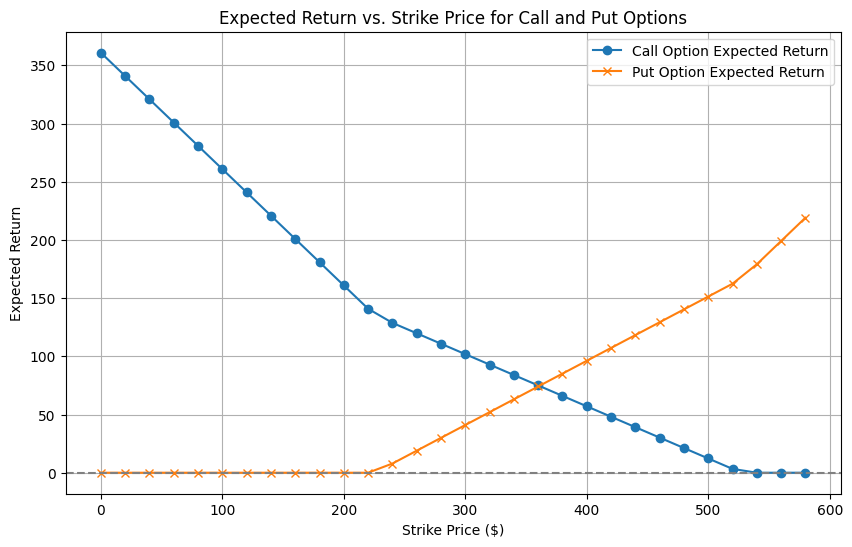

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 345  # Current Tesla stock price
K = 350  # Initial strike price
u = np.exp(0.6 * np.sqrt(0.5))  # Up factor
d = np.exp(-0.6 * np.sqrt(0.5))  # Down factor
r = 0.05  # Annualized continuously compounded 3-month interest rate
T = 0.5  # Time to maturity in years (6 months)
real_return = 0.09  # Real-world expected annual stock price return

# Part (a): One-period model pricing
p = (np.exp(r * T) - d) / (u - d)  # Risk-neutral probability

# Stock prices at maturity
S_u = S0 * u
S_d = S0 * d

# Call and put prices
call_price = np.exp(-r * T) * (p * max(S_u - K, 0) + (1 - p) * max(S_d - K, 0))
put_price = np.exp(-r * T) * (p * max(K - S_u, 0) + (1 - p) * max(K - S_d, 0))

# Part (b): Real-world probabilities
expected_ST = S0 * np.exp(real_return * T)  # Real-world expected stock price
p_real = (expected_ST - S0 * d) / (S0 * (u - d))
q_real = 1 - p_real

# Part (c): Expected return of options
expected_call_payoff = p_real * max(S_u - K, 0) + q_real * max(S_d - K, 0)
expected_put_payoff = p_real * max(K - S_u, 0) + q_real * max(K - S_d, 0)

expected_call_return = (expected_call_payoff - call_price) / call_price if call_price > 0 else 0
expected_put_return = (expected_put_payoff - put_price) / put_price if put_price > 0 else 0

# Print results for parts (a) through (c)
print("Part (a): Option Pricing")
print(f"Call Option Price: {call_price:.2f}")
print(f"Put Option Price: {put_price:.2f}")

print("\nPart (b): Real-World Probabilities")
print(f"Real-world probability of up movement: {p_real:.4f}")
print(f"Real-world probability of down movement: {q_real:.4f}")

print("\nPart (c): Expected Returns")
print(f"Call Option Expected Return: {expected_call_return:.2f}")
print(f"Put Option Expected Return: {expected_put_return:.2f}")

# Part (d): Strike price sensitivity
strike_prices = np.arange(0, 600, 20)  # Range of strike prices
call_returns = []
put_returns = []

for K in strike_prices:
    call_price = np.exp(-r * T) * (p * max(S_u - K, 0) + (1 - p) * max(S_d - K, 0))
    put_price = np.exp(-r * T) * (p * max(K - S_u, 0) + (1 - p) * max(K - S_d, 0))
    
    expected_call_payoff = p_real * max(S_u - K, 0) + q_real * max(S_d - K, 0)
    expected_put_payoff = p_real * max(K - S_u, 0) + q_real * max(K - S_d, 0)

    
    call_returns.append(expected_call_payoff )
    put_returns.append(expected_put_payoff)

# Plot the returns against strike prices
plt.figure(figsize=(10, 6))
plt.plot(strike_prices, call_returns, label='Call Option Expected Return', marker='o')
plt.plot(strike_prices, put_returns, label='Put Option Expected Return', marker='x')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Strike Price ($)')
plt.ylabel('Expected Return')
plt.title('Expected Return vs. Strike Price for Call and Put Options')
plt.legend()
plt.grid()
plt.show()

